In [20]:
# Dependencies and Setup
##
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy
import json
import time
import datetime as dt

# Import API key
from Config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []
humidity= []
clouds = []
wind = []
lat = []
lng = []
missing_cities = []


# Create a set of random lat and lng combinations
# lats = np.linspace(90.000, -90.000, 1800)
# lngs = np.linspace(180.000, -180.000, 3600)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
date = str(dt.date.today())
print(date)

643
2018-09-27


## Perform API Calls

In [21]:

# Starting URL for Weather Map API Call
counter = 0
cleaned_cities = []
city_count = len(cities)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
while time.process_time() > counter and counter < city_count:
    for counter, city in enumerate(cities):    
        query = f"{url}&q={city}"
        response = requests.get(query).json()
        print(f"Processing Record {counter+1} of {city_count} |   {city}")
        print(query)
        try:
            temp.append(response["main"]["temp"])
            humidity.append(response["main"]["humidity"])
            clouds.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            cleaned_cities.append(city)
        except KeyError as e:
            print("City not found, skipping")
            missing_cities.append(city)
        print("---------------------------------------------------------")

print("---------------------------------------------------------")
print("-----------------Data Retrieval Complete-----------------")
print("---------------------------------------------------------")


Processing Record 1 of 616 |   port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4fb5009466cf359b2b878ed2174f47c&q=port alfred
---------------------------------------------------------
Processing Record 2 of 616 |   grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4fb5009466cf359b2b878ed2174f47c&q=grindavik
---------------------------------------------------------
Processing Record 3 of 616 |   nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4fb5009466cf359b2b878ed2174f47c&q=nanortalik
---------------------------------------------------------
Processing Record 4 of 616 |   faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4fb5009466cf359b2b878ed2174f47c&q=faya
---------------------------------------------------------
Processing Record 5 of 616 |   naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4fb5009466cf359b2b878ed2174f47c&q=naze
------------

KeyboardInterrupt: 

In [4]:
Weather_Dict = {
    "city": cleaned_cities,
    "temp":temp,
    "humidity":humidity,
    "clouds":clouds,
    "Wind Speed":wind,
    "lat":lat,
    "lng":lng,

}
Weather_DF = pd.DataFrame(Weather_Dict)
Weather_DF.tail()
Weather_DF.to_csv("cityWeather.csv")

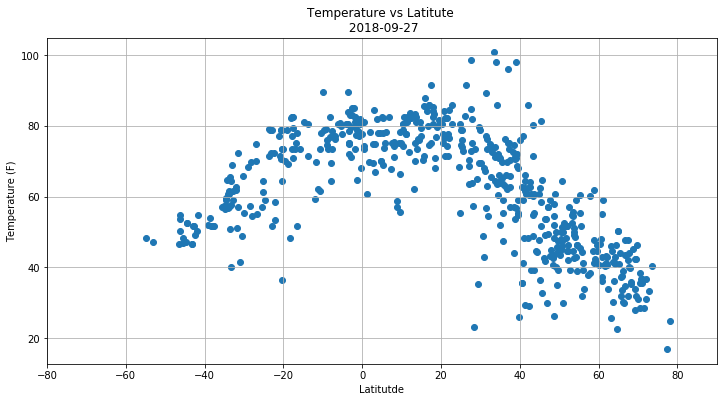

In [26]:
#Temp VS Latitude
plt.figure(figsize=(12,6))
plt.scatter(Weather_DF["lat"], Weather_DF["temp"])
plt.xlim(-80, 90)
plt.title(f"Temperature vs Latitute \n {date}")
plt.grid(b=True)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitutde")
plt.savefig("TempvsLat.png")

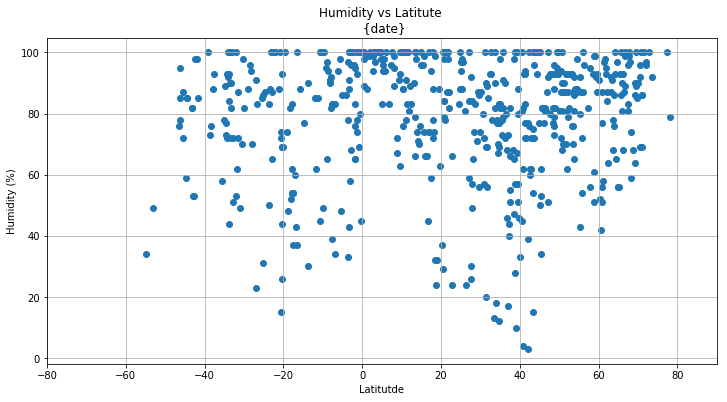

In [28]:
#Humidity VS Latitude
x = Weather_DF["lat"]
y = Weather_DF["humidity"]
plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.xlim(-80, 90)
plt.title(f"Humidity vs Latitute \n {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitutde")
plt.grid(b=True)
plt.savefig("HumidvsLat.png")


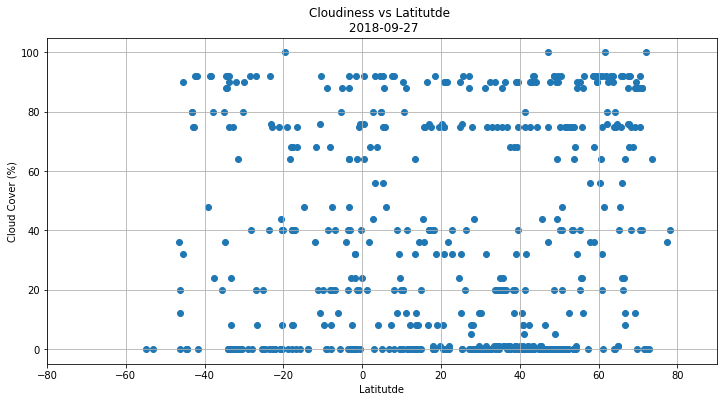

In [30]:
#Cloudiness vs Latitude
plt.figure(figsize=(12,6))
plt.scatter(Weather_DF["lat"], Weather_DF["clouds"])
plt.xlim(-80, 90)
plt.title(f"Cloudiness vs Latitutde \n {date}")
plt.grid(b=True)

plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitutde")
plt.savefig("CloudsvsLat.png")


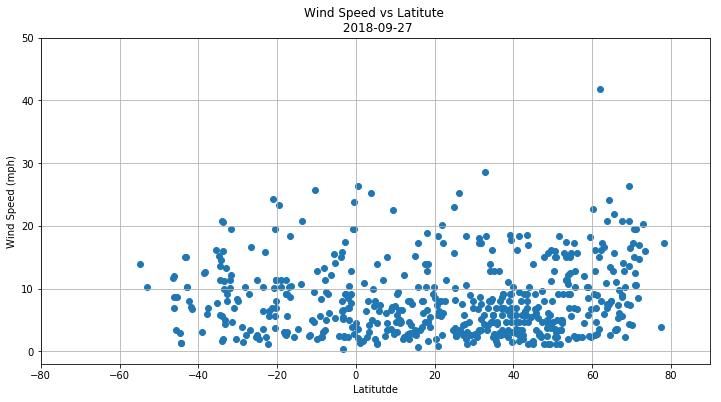

In [32]:
#Wind Speed Vs Latitude
plt.figure(figsize=(12,6))
plt.scatter(Weather_DF["lat"], Weather_DF["Wind Speed"])
plt.ylim(-2, 50)
plt.xlim(-80, 90)
plt.title(f"Wind Speed vs Latitute \n {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitutde")
plt.grid(b=True)
plt.savefig("WindvsLat.png")
